In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
path = '../../data/LDA/face_data/'

ids = range(1, 16) # 15 people

states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight', 'sad',
          'sleepy', 'surprised', 'wink']
prefix = 'subject'
surfix = '.png'


In [5]:
# open one picture to get the image's size

fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn)

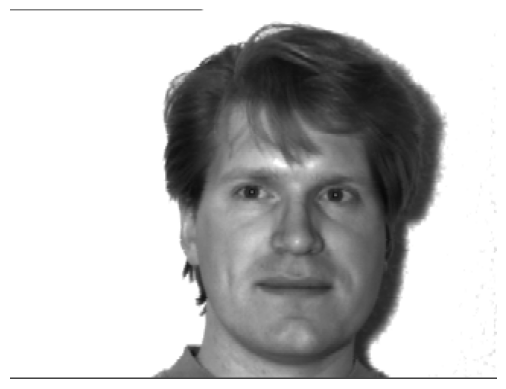

In [6]:
plt.imshow(im, cmap='gray')
plt.axis('off')  # Ẩn trục tọa độ
plt.show()

In [7]:
h = im.shape[0]
w = im.shape[1]

D = h * w
N = len(states) * 15
print(N, D, h , w)

165 77760 243 320


In [8]:
X = np.zeros((D, N))
y = []

# collect all data
count = 0

for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        
        # open the file and read as gray image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        
        # then add image to dataset X
        X[:, count] = tmp.reshape(D)
        y.append(state)
        count += 1

Chuyển X thành DataFrame

In [9]:
X_1 = pd.DataFrame(X.T)
X_1.head()

,0,1,2,3,4,5,6,7,8,9,...,77750,77751,77752,77753,77754,77755,77756,77757,77758,77759
0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
1,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
2,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
3,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,129.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
4,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0


In [10]:
y = pd.Series(y)
y.shape

(165,)

In [11]:
df = pd.concat([X_1, y], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,77751,77752,77753,77754,77755,77756,77757,77758,77759,0
0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,centerlight
1,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,glasses
2,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,happy
3,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,129.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,leftlight
4,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,noglasses


Chuyển đổi cột chứa giá trị labels về dạng số

In [12]:
encoder = LabelEncoder()
df.iloc[:, -1] = encoder.fit_transform(df.iloc[:, -1])

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,77751,77752,77753,77754,77755,77756,77757,77758,77759,0
0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,0
1,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,1
2,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,2
3,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,129.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,3
4,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,4


In [14]:
X_df = df.iloc[:, :-1]
y_df = df.iloc[:, -1]

In [15]:
y_df = y_df.astype(int)

In [16]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,77750,77751,77752,77753,77754,77755,77756,77757,77758,77759
0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
1,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
2,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
3,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,129.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
4,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,...,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0


Giảm chiều dữ liệu về còn 135

In [17]:
pca = PCA(n_components=135)

X_df_pca = pd.DataFrame(pca.fit_transform(X_df))
X_df_pca.shape

(165, 135)

Khởi tạo mô hình `Logistic Regression` và `Naive Bayes` và chia dữ liệu thành tập Train:Test với tỷ lệ 0.7:0.3

In [18]:
logR = LogisticRegression(multi_class='multinomial', solver='sag')
nb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X_df_pca, y_df, test_size=0.3, random_state=18)

In [19]:
logR.fit(X_train, y_train)
y_pred_logR = logR.predict(X_test)
print(accuracy_score(y_test, y_pred_logR))

0.24


d:\Subjects_In_University\Machine_Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Subjects_In_University\Machine_Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))

0.18
